Import modules

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

Read data from files, extract the columns of interest, and remove prefixes from their names.

In [73]:
df_FI = pd.read_csv("bandsFI.csv")
df_FI["country"] = "FI"
df_EE = pd.read_csv("bandsEE.csv")
df_EE["country"] = "EE"
df_LV = pd.read_csv("bandsLV.csv")
df_LV["country"] = "LV"
df = pd.concat([df_FI, df_EE, df_LV], ignore_index=True)

genres = df[df.filter(like="genre_").columns]
years = df[df.filter(like="active_").columns]
releases = df[df.filter(like="release_").columns]

genres.columns = [col.replace("genre_", "") for col in genres.columns]
years.columns = [col.replace("active_", "") for col in years.columns]
releases.columns = [col.replace("release_", "") for col in releases.columns]

Draw the plots for number and share of active bands playing each genre for each year.

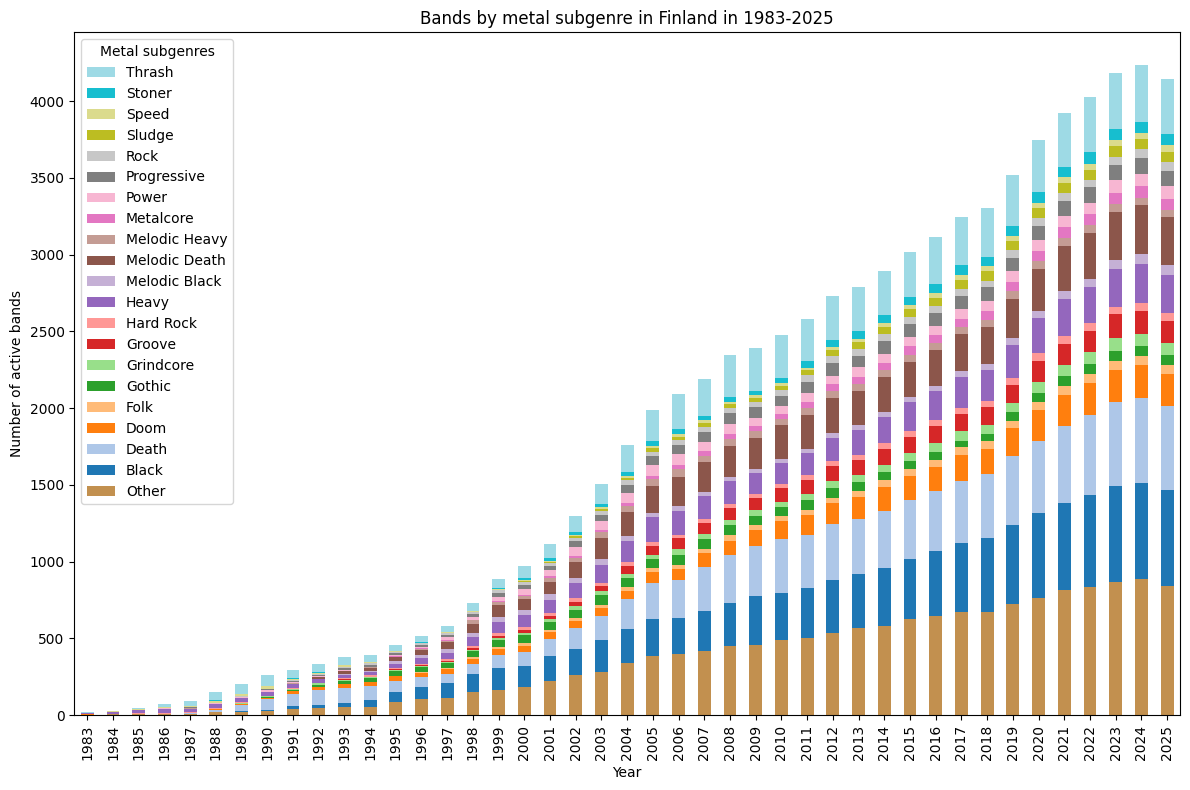

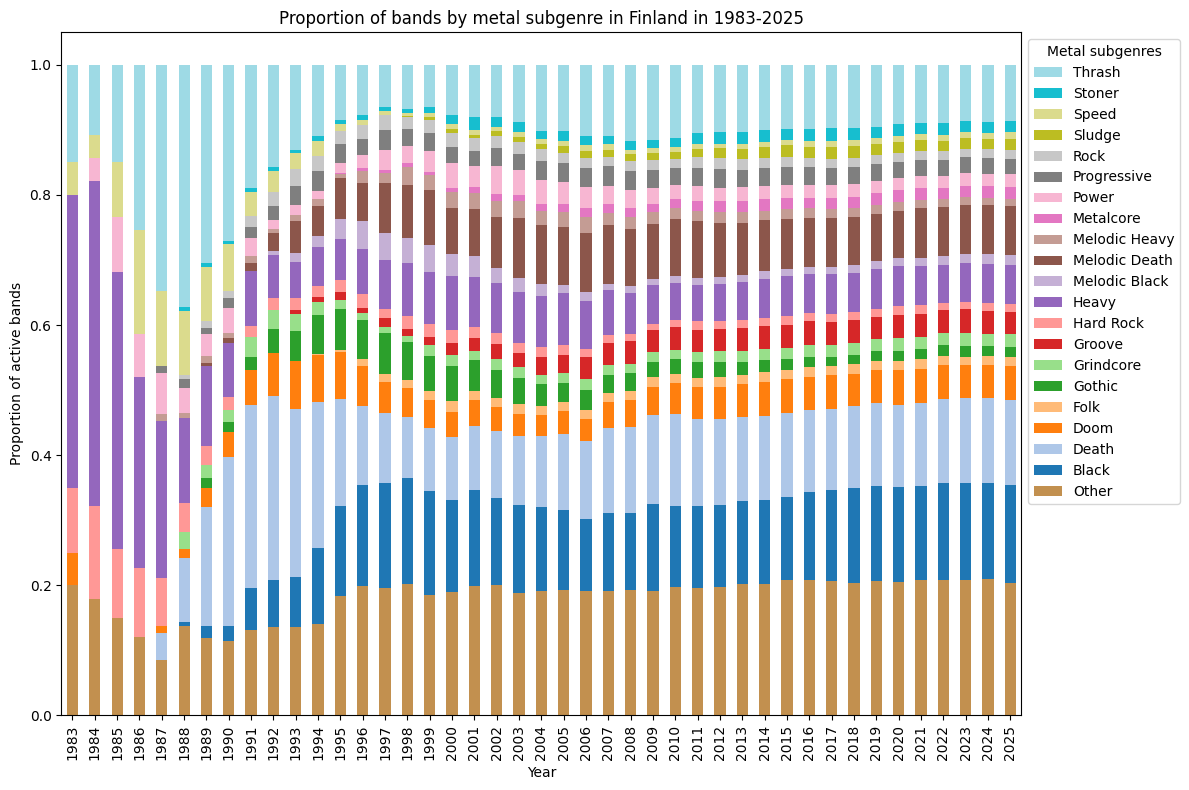

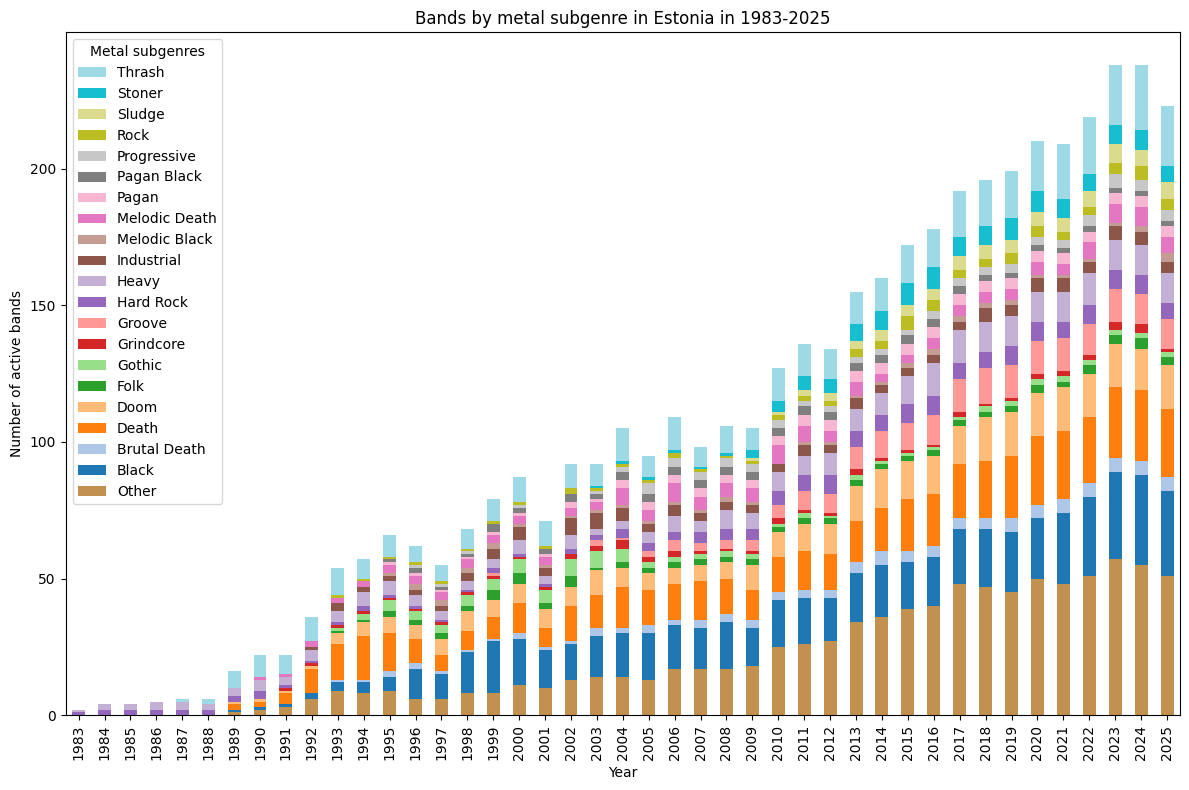

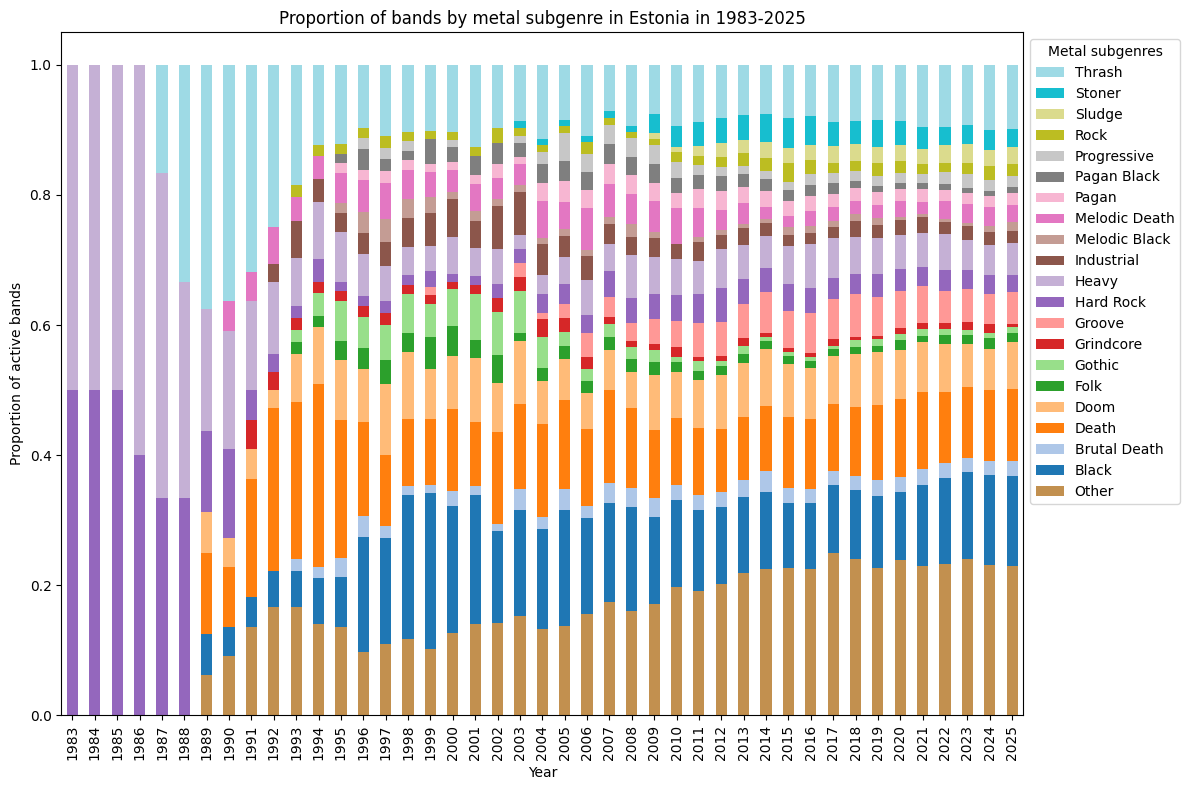

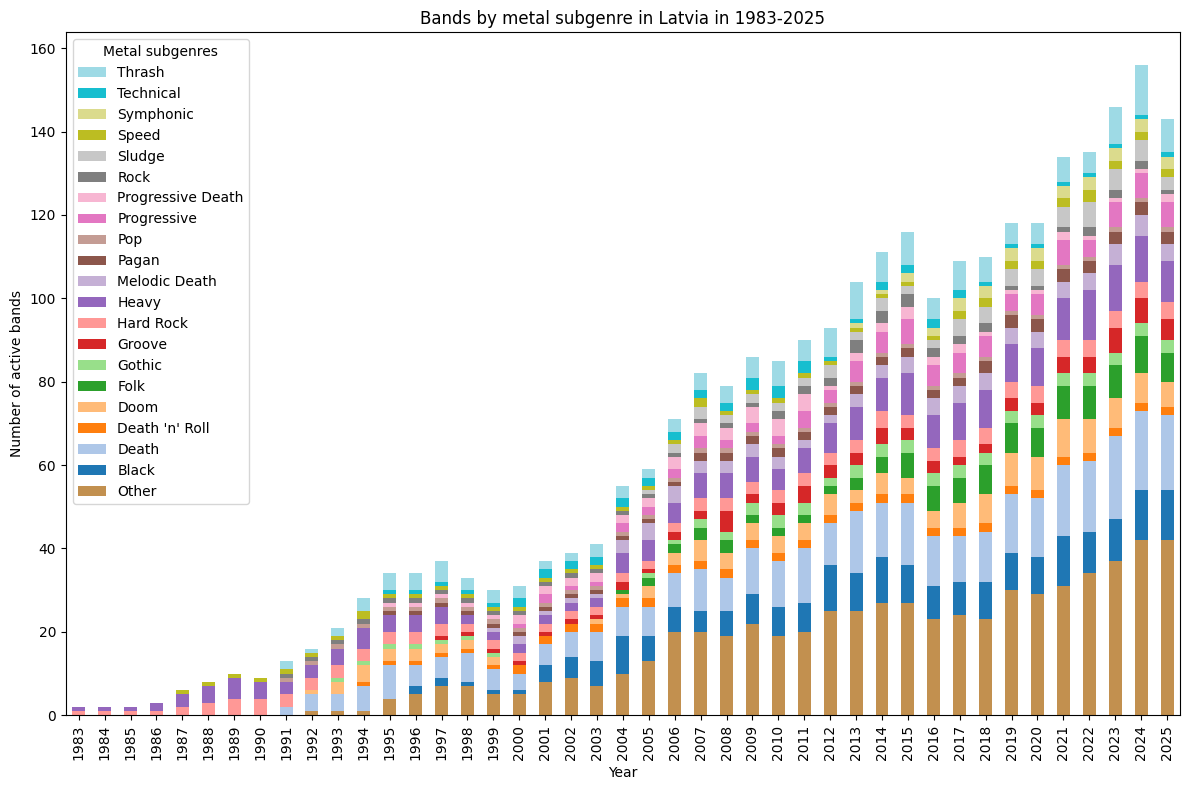

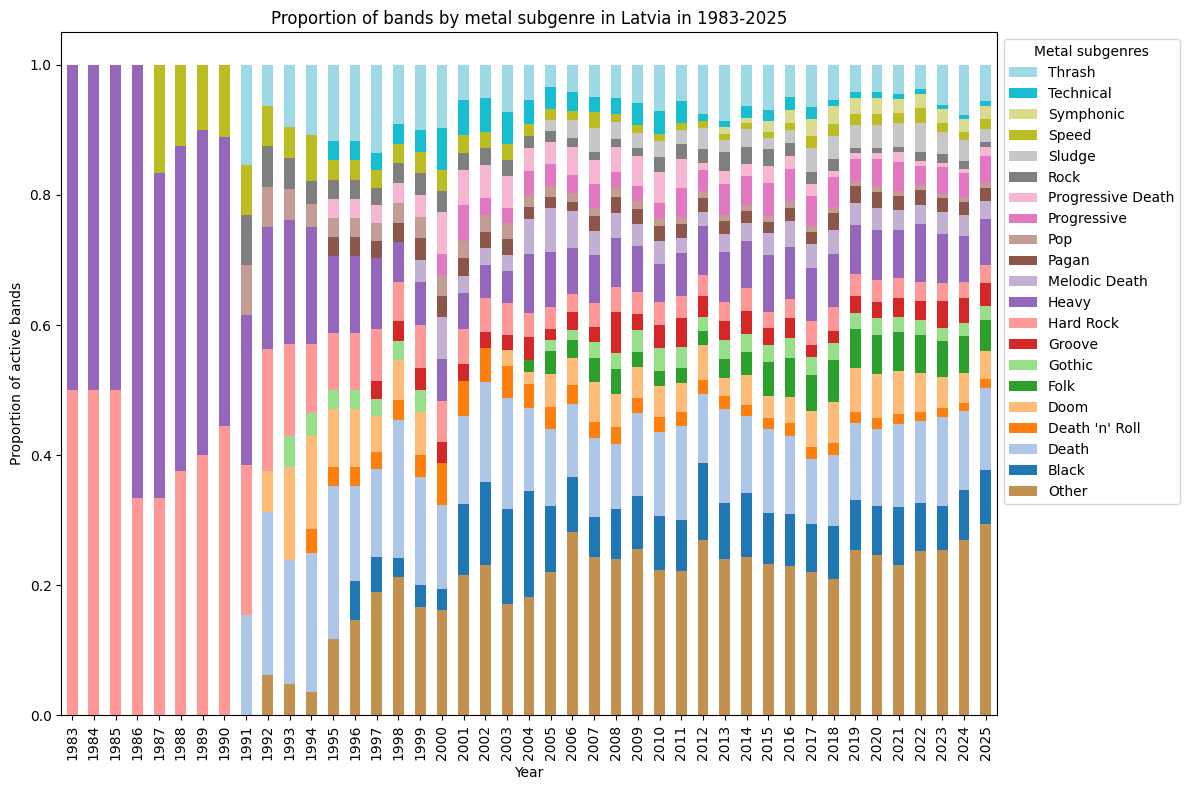

In [74]:
def plotbands(country, genres, years, threshold, file="genretimeline", country_names={"EE": "Estonia", "FI": "Finland", "LV": "Latvia"}):
    idx_ = df[df["country"] == country].index
    years_ = years.loc[idx_]
    genres_ = genres.loc[idx_]

    genres_by_year = years_.T.dot(genres_)

    genres_by_year.index = genres_by_year.index.astype(int)
    genres_by_year = genres_by_year.sort_index()

    # Label smaller genres as "Other" in the plot for less clutter
    small_genres = genres_by_year.sum(axis=0) <= threshold

    major_genres = genres_by_year.loc[:, ~small_genres].copy()
    other = genres_by_year.loc[:, small_genres].sum(axis=1)
    major_genres = pd.concat([other.rename("Other"), major_genres], axis=1)
    major_genres = major_genres[major_genres.sum(axis=1) > 0]
    # Drop 2026 (Bands with future releases already announced are marked as active in the future)
    if 2026 in major_genres.index:
        major_genres = major_genres.drop(2026)
    # Drop earlier years to have the same years in each plot
    for y in range(1972,1983):
        if y in major_genres.index:
            major_genres = major_genres.drop(y)


    colours = list(plt.cm.tab20.colors)
    colours.insert(0, "#c2904f")

    ax = major_genres.plot(kind="bar", stacked=True, figsize=(12, 8), color=colours,
                           title=f"Bands by metal subgenre in {country_names[country]} in 1983-2025",
                           xlabel="Year", ylabel="Number of active bands")
    # Reverse legend order for ease of reading
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title="Metal subgenres")
    plt.tight_layout()
    plt.savefig(file+country+".png")
    plt.show()

    # Relative share of genres
    relative_genres = major_genres.div(major_genres.sum(axis=1), axis=0)

    ax = relative_genres.plot(kind="bar", stacked=True, figsize=(12, 8), color=colours,
                           title=f"Proportion of bands by metal subgenre in {country_names[country]} in 1983-2025",
                           xlabel="Year", ylabel="Proportion of active bands")
    # Reverse legend order for ease of reading
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title="Metal subgenres", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.savefig("relative_"+file+country+".png")
    plt.show()

plotbands("FI", genres, years, 600)
plotbands("EE", genres, years, 40)
plotbands("LV", genres, years, 32)


Draw the same plots for releases.

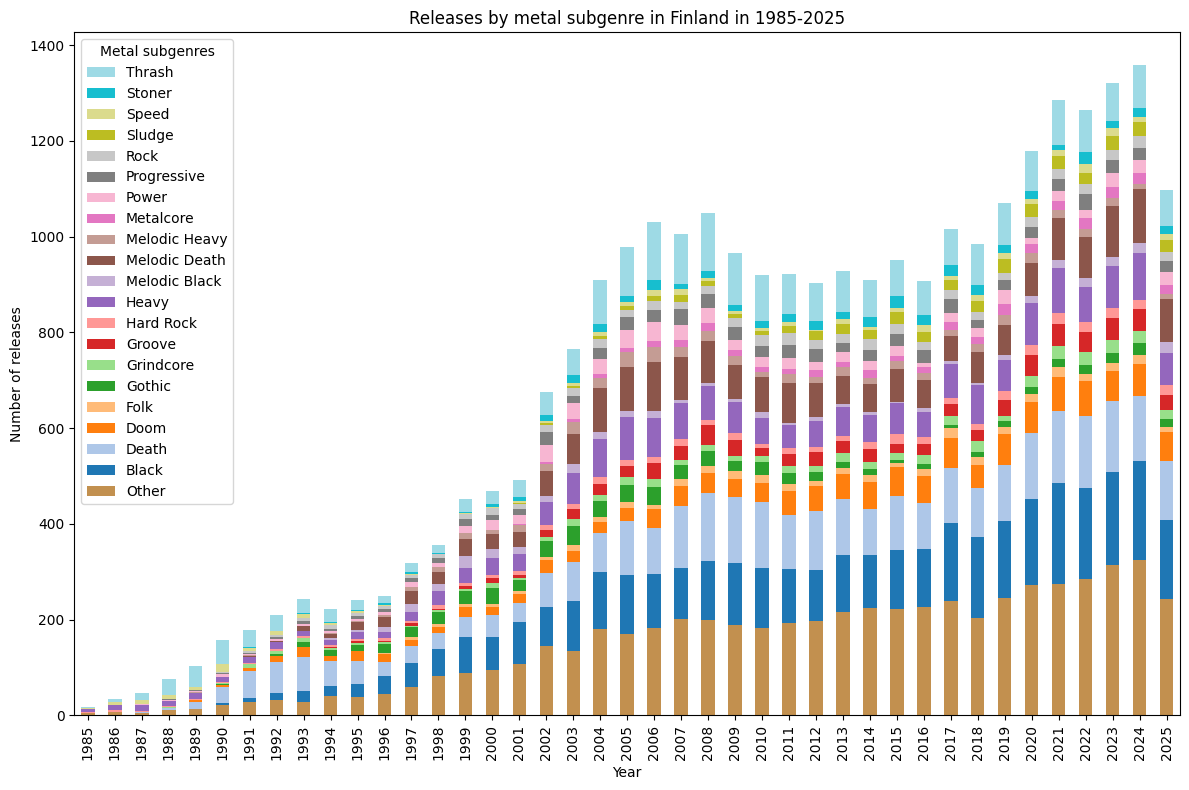

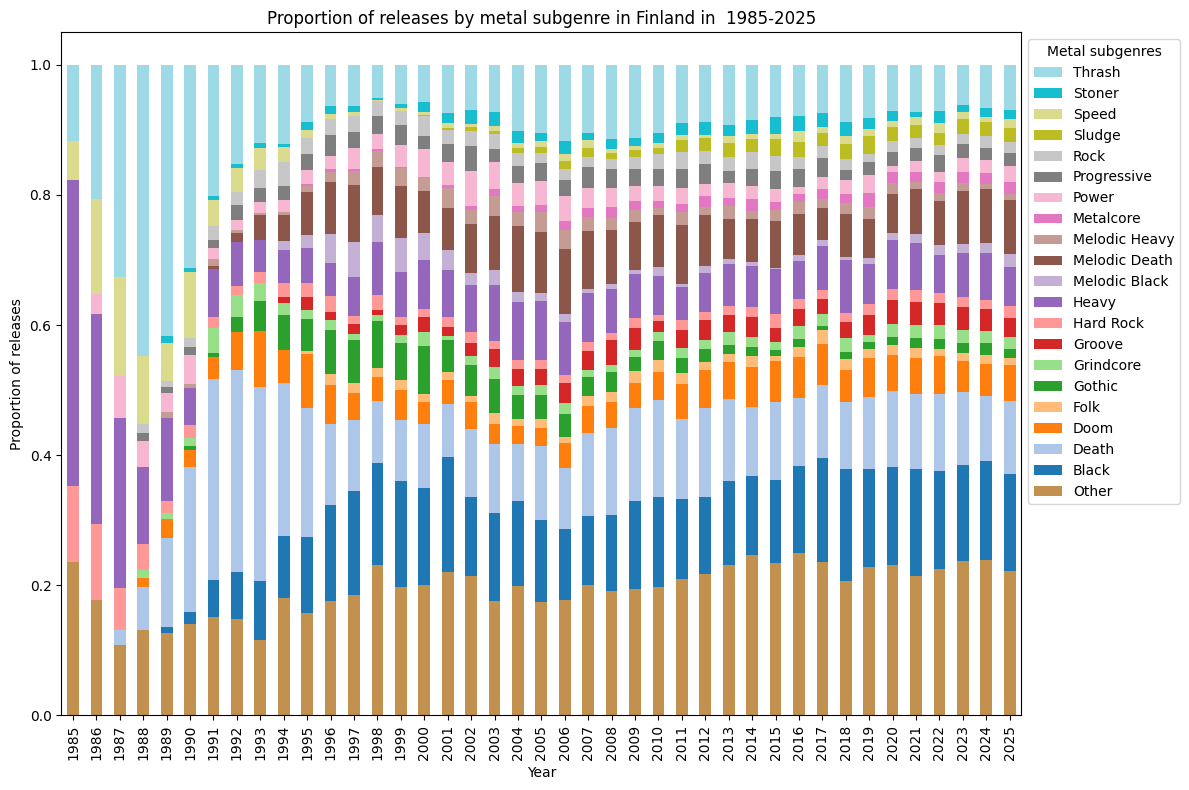

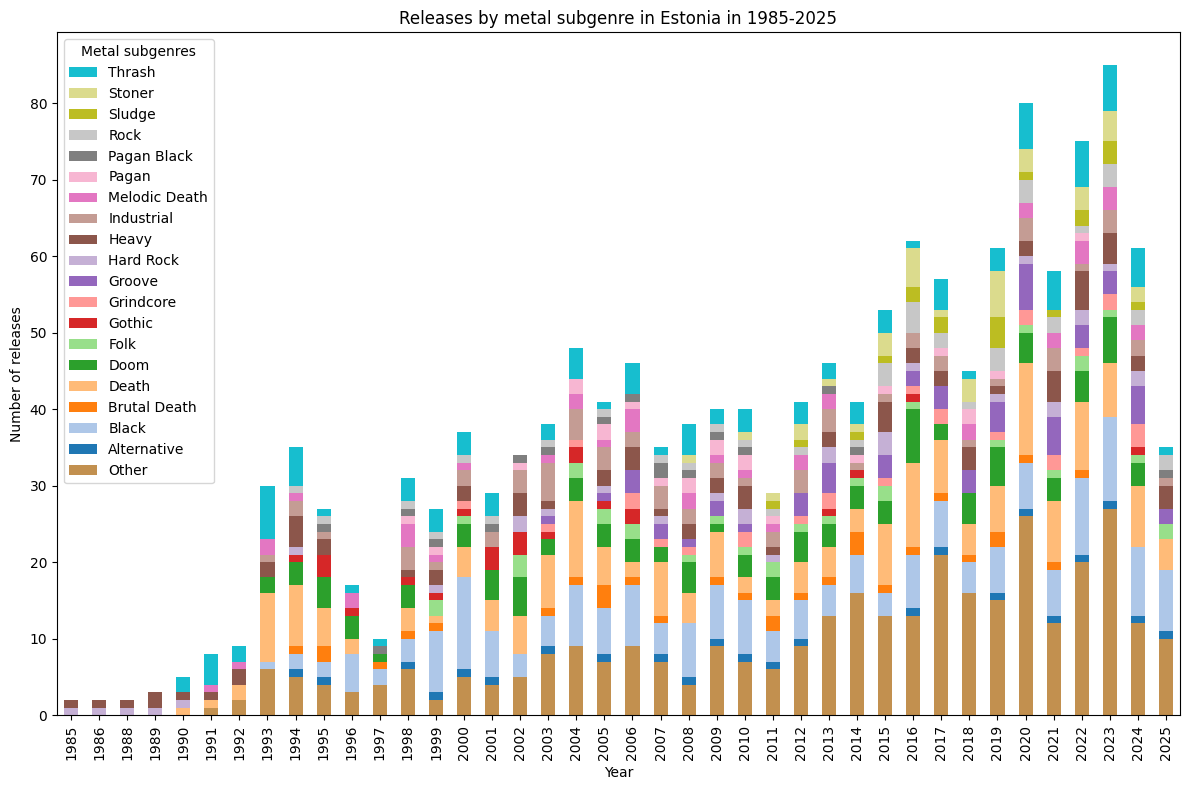

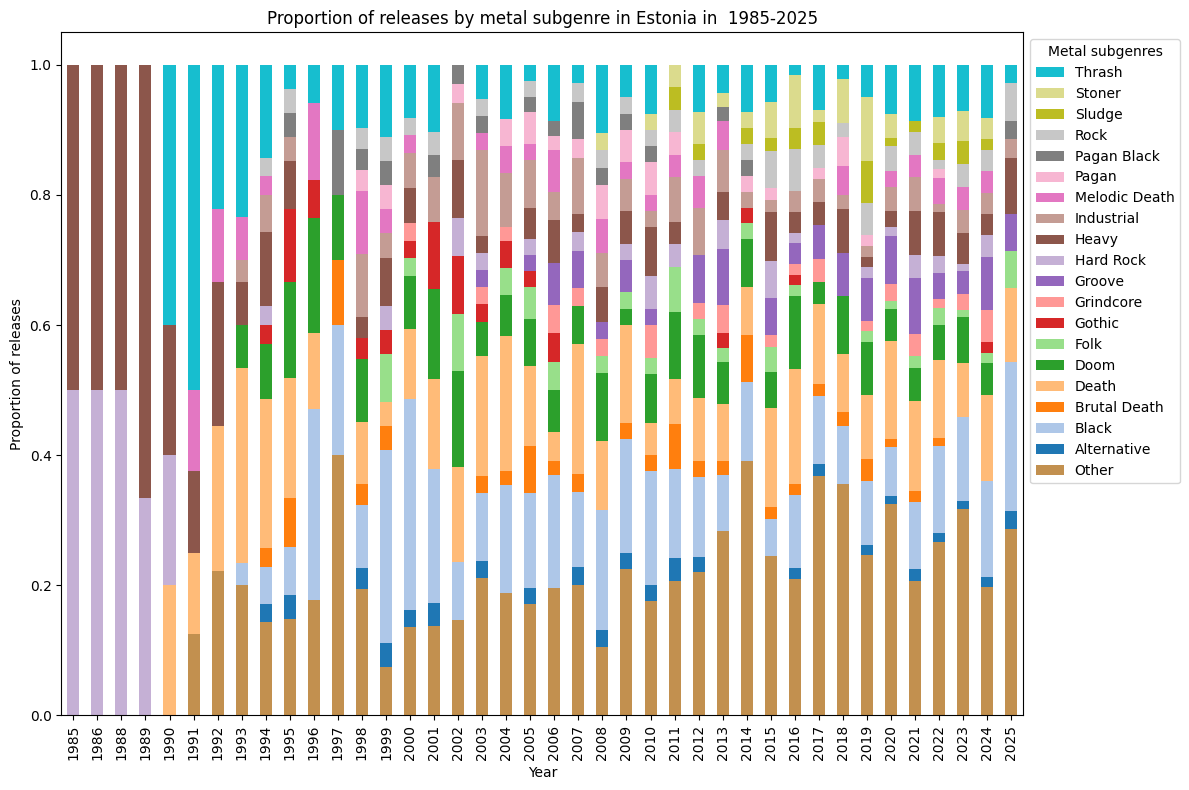

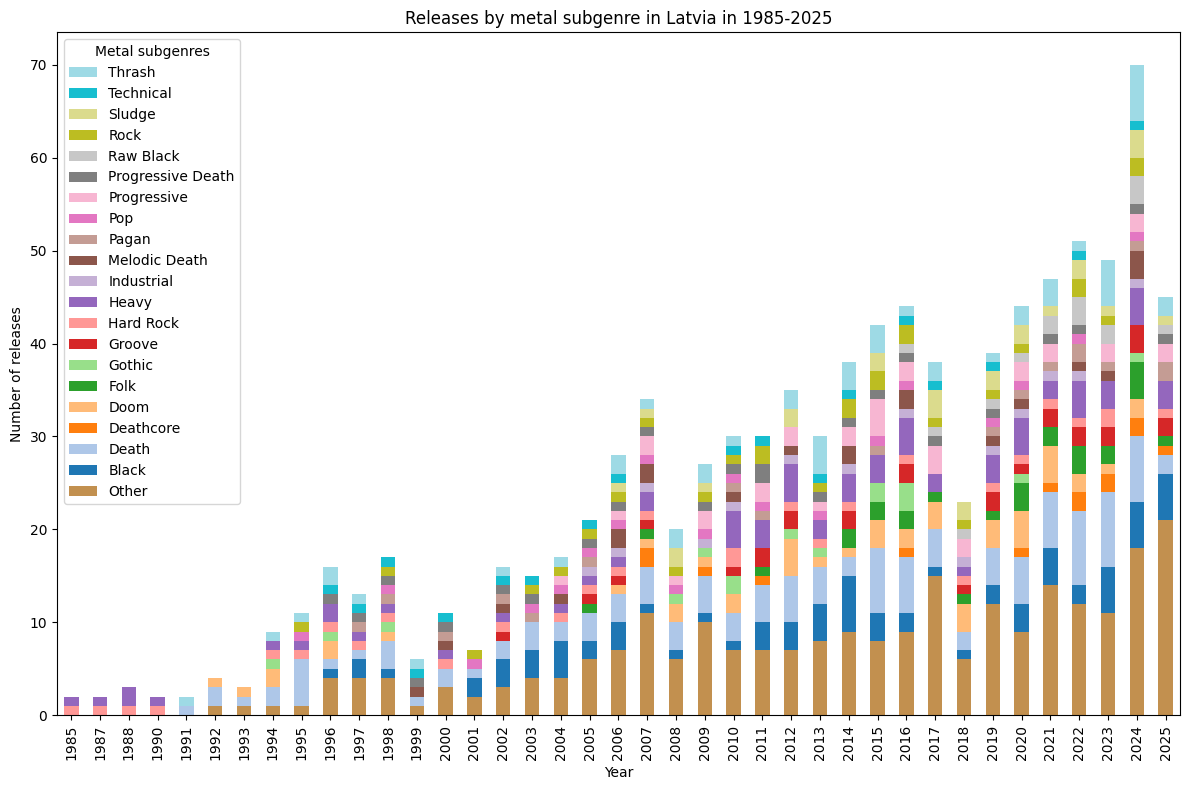

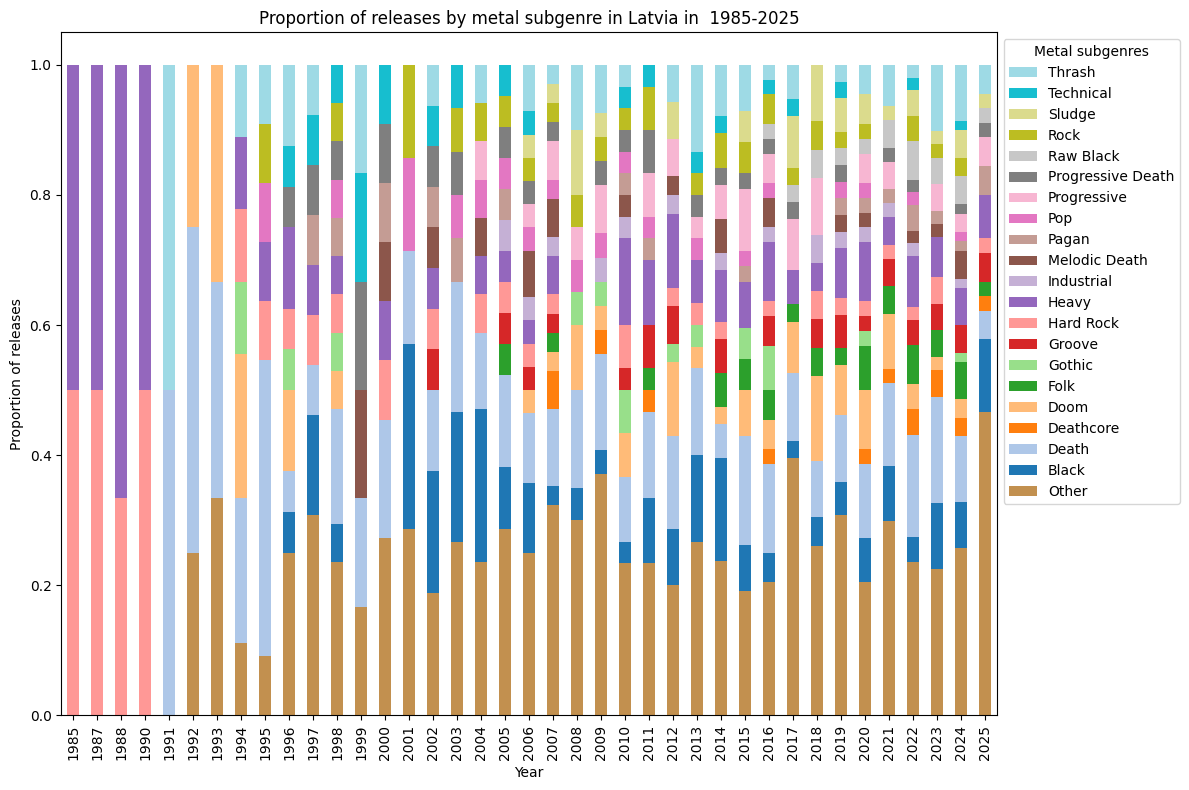

In [75]:
def plotreleases(country, genres, releases, threshold, file="releasetimeline", country_names={"EE": "Estonia", "FI": "Finland", "LV": "Latvia"}):
    idx_ = df[df["country"] == country].index
    releases_ = releases.loc[idx_]
    genres_ = genres.loc[idx_]

    genres_by_year_releases = releases_.T.dot(genres_)

    genres_by_year_releases.index = genres_by_year_releases.index.astype(int)
    genres_by_year_releases = genres_by_year_releases.sort_index()

    # Label smaller genres as "Other" in the plot for less clutter
    small_genres = genres_by_year_releases.sum(axis=0) <= threshold

    major_genres = genres_by_year_releases.loc[:, ~small_genres].copy()
    other = genres_by_year_releases.loc[:, small_genres].sum(axis=1)
    major_genres = pd.concat([other.rename("Other"), major_genres], axis=1)
    major_genres = major_genres[major_genres.sum(axis=1) > 0]
    # Drop 2026
    if 2026 in major_genres.index:
        major_genres = major_genres.drop(2026)
    # Drop earlier years to have the same years in each plot
    for y in range(1972,1985):
        if y in major_genres.index:
            major_genres = major_genres.drop(y)


    colours = list(plt.cm.tab20.colors)
    colours.insert(0, "#c2904f")

    ax = major_genres.plot(kind="bar", stacked=True, figsize=(12, 8), color=colours,
                           title=f"Releases by metal subgenre in {country_names[country]} in 1985-2025",
                           xlabel="Year", ylabel="Number of releases")
    # Reverse legend order for ease of reading
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title="Metal subgenres")
    plt.tight_layout()
    plt.savefig(file+country+".png")
    plt.show()

    # Relative share of genres
    relative_genres = major_genres.div(major_genres.sum(axis=1), axis=0)

    ax = relative_genres.plot(kind="bar", stacked=True, figsize=(12, 8), color=colours,
                           title=f"Proportion of releases by metal subgenre in {country_names[country]} in  1985-2025",
                           xlabel="Year", ylabel="Proportion of releases")
    # Reverse legend order for ease of reading
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title="Metal subgenres", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.savefig("relative_"+file+country+".png")
    plt.show()

plotreleases("FI", genres, releases, 300)
plotreleases("EE", genres, releases, 16)
plotreleases("LV", genres, releases, 13)

The same plots for formed bands.

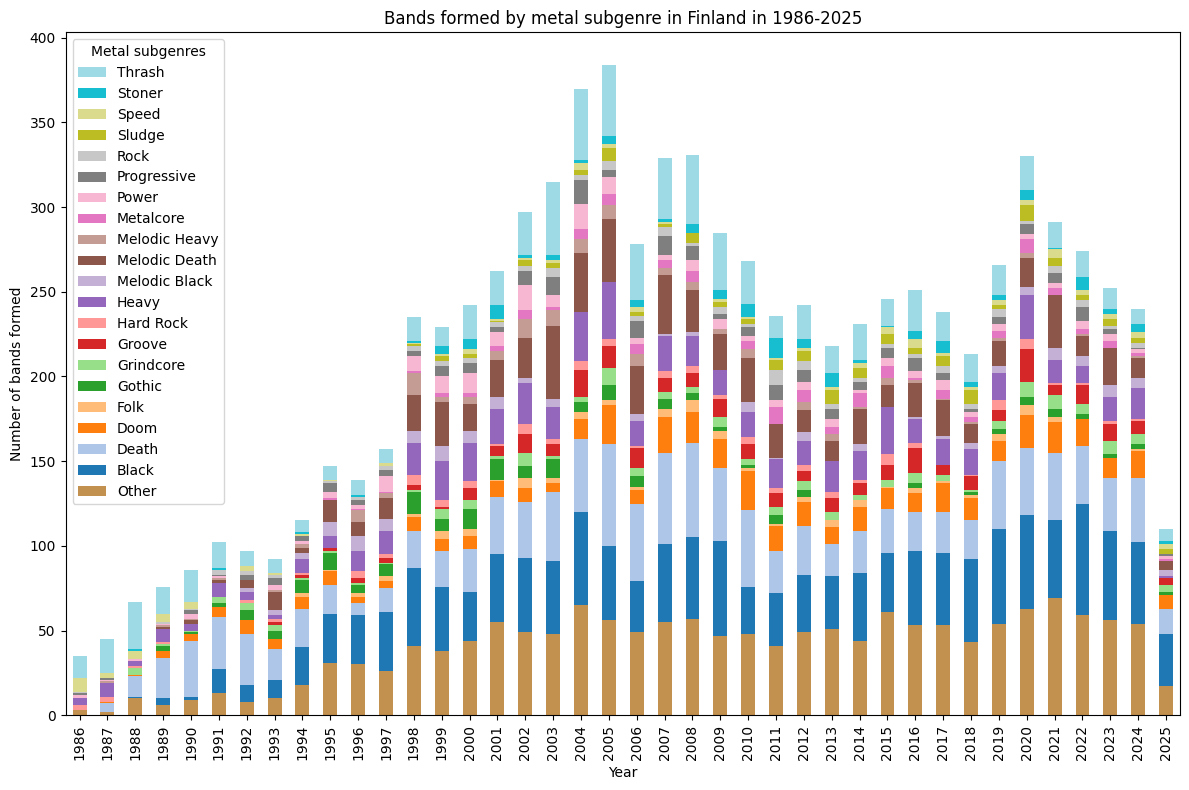

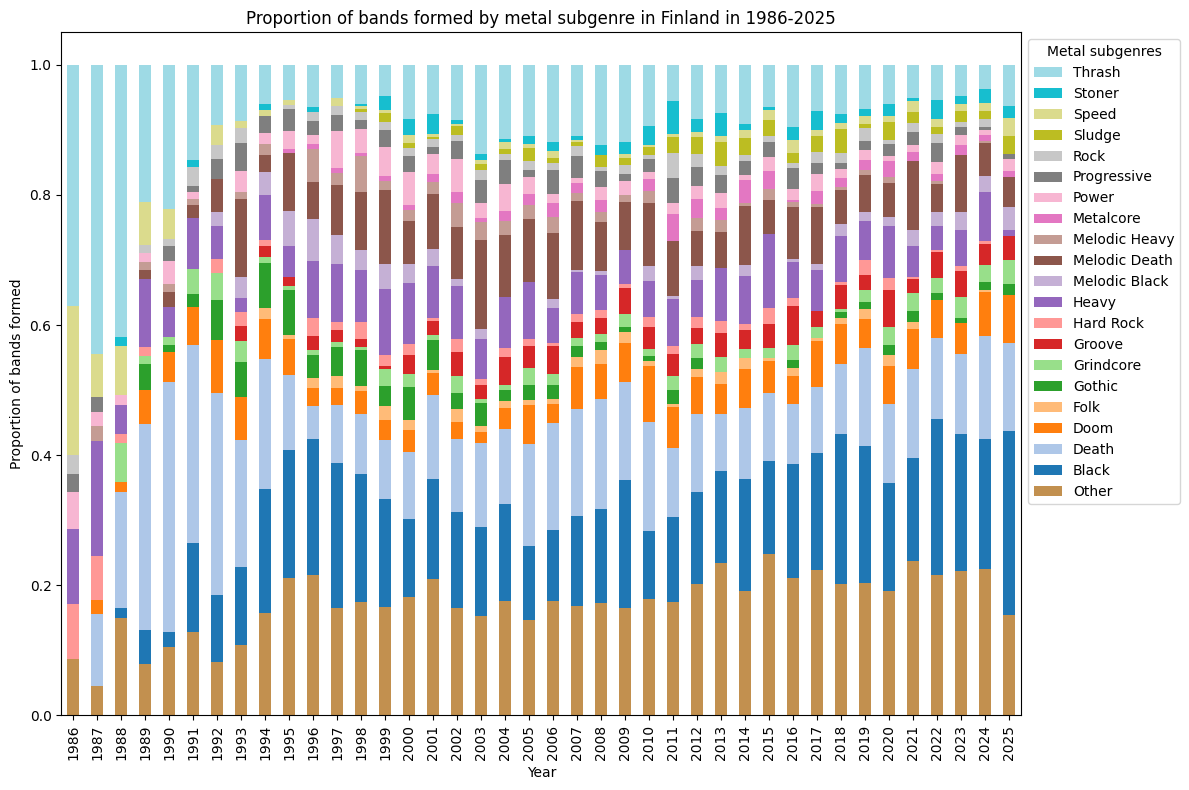

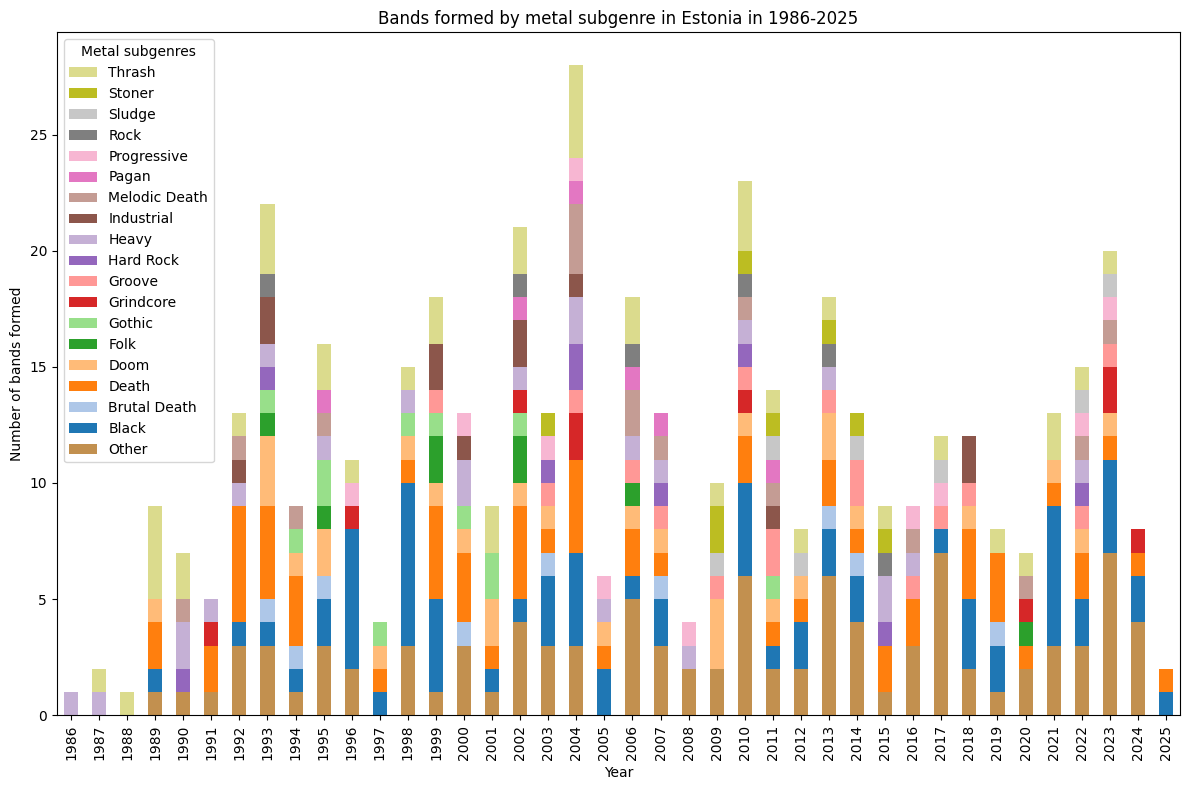

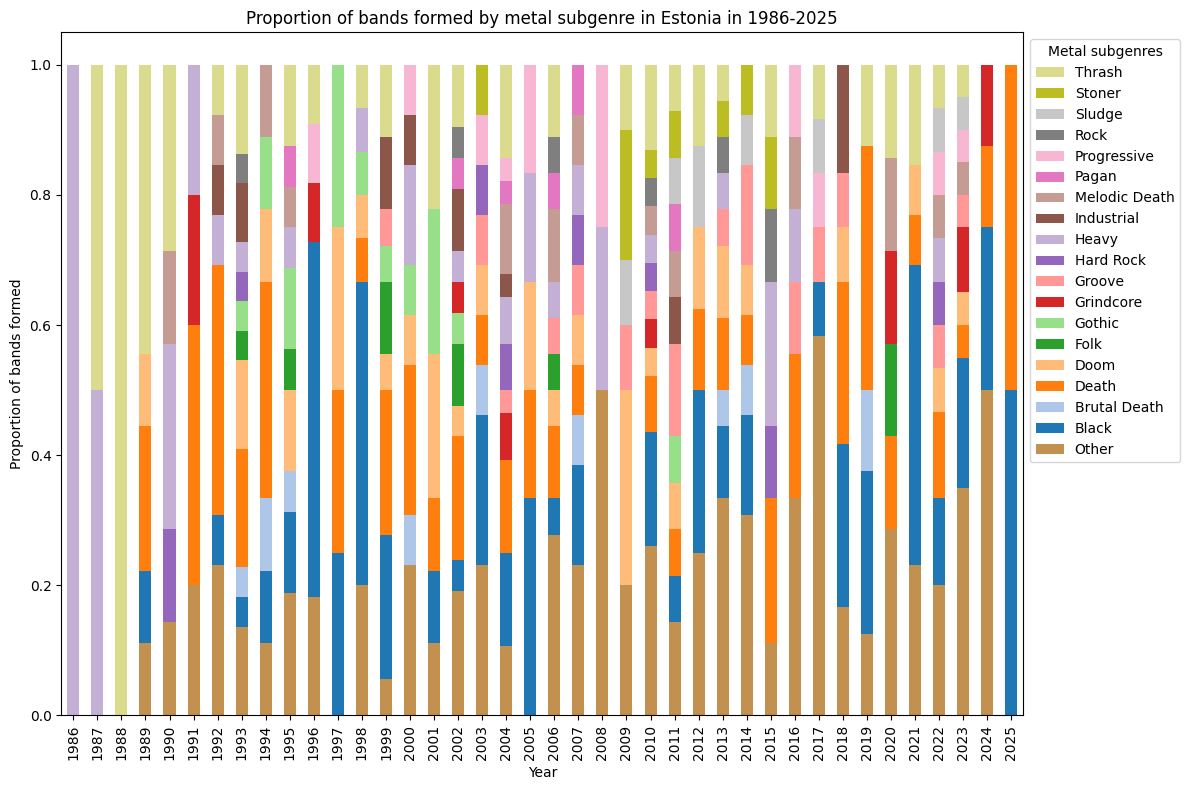

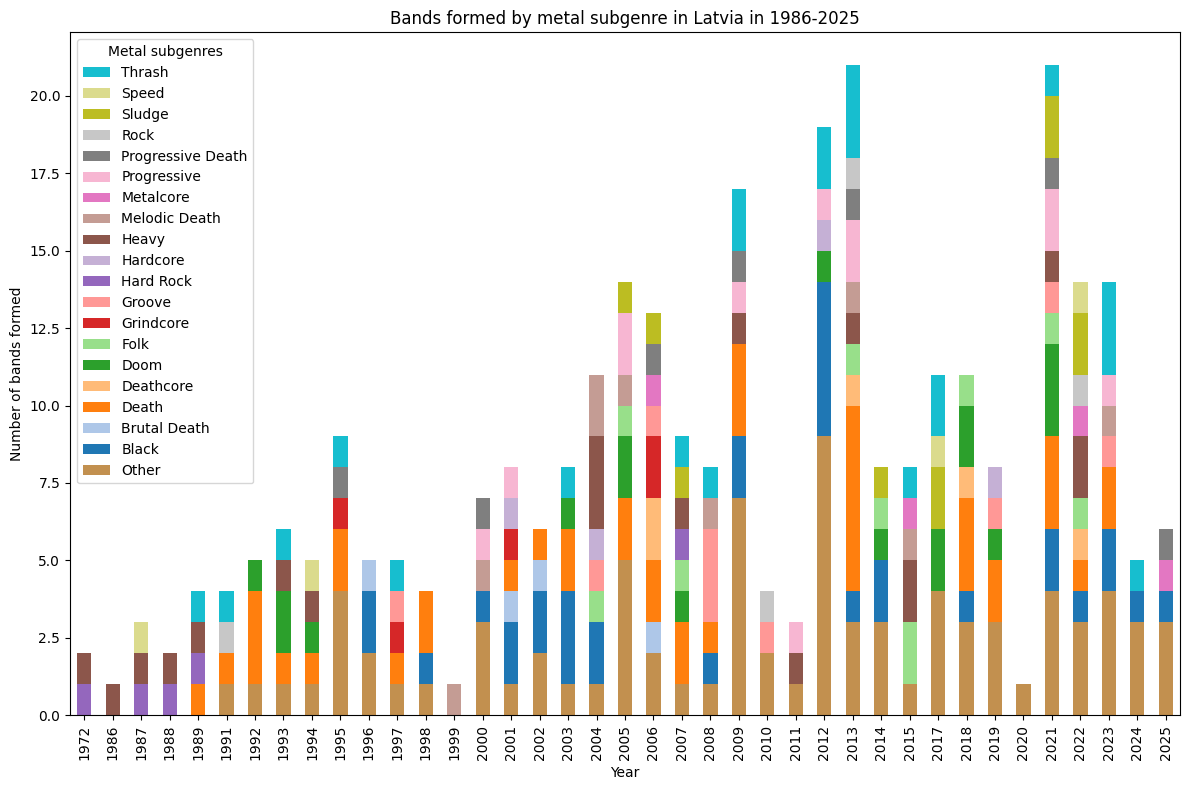

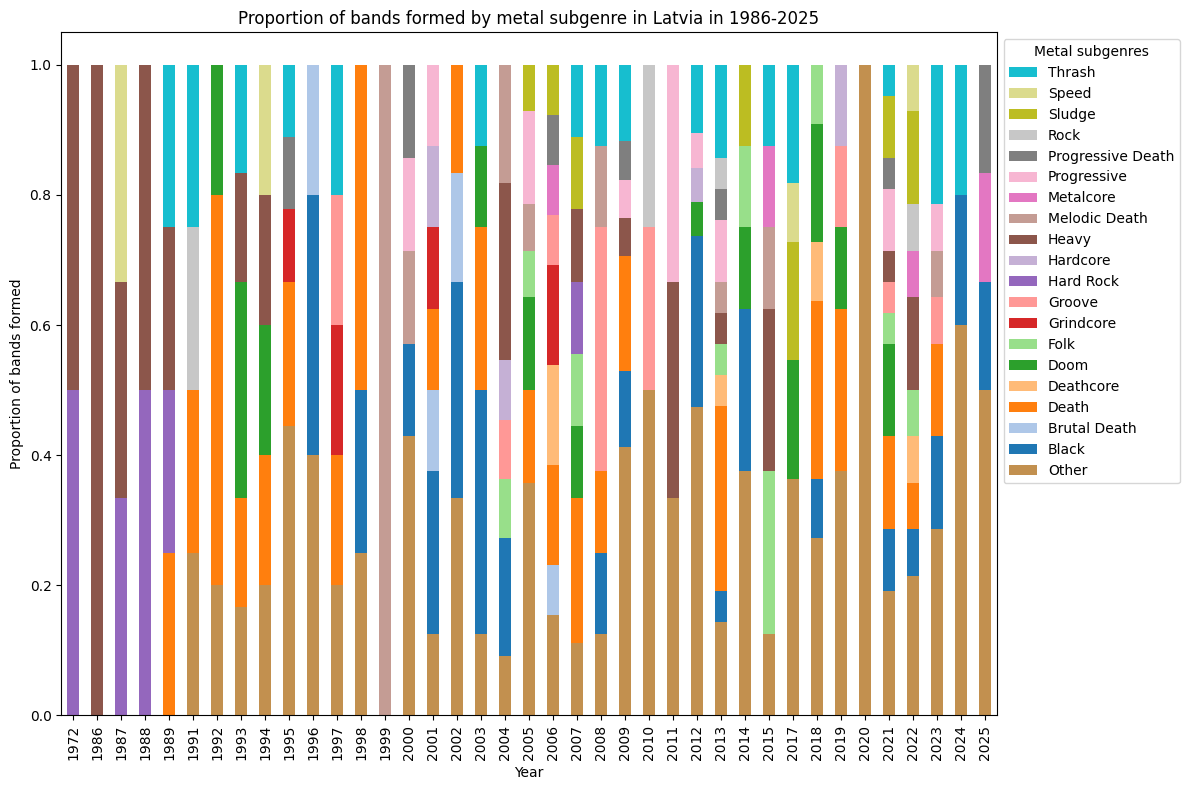

In [76]:
def plotformed(country, genres, threshold, file="formedtimeline", country_names={"EE": "Estonia","FI": "Finland","LV": "Latvia"}):
    idx_ = df[df["country"] == country].index
    genres_ = genres.loc[idx_]
    formed_by_year = pd.DataFrame({year: genres_.loc[i].sum() for year, i in df.loc[idx_].groupby("formed").groups.items()}).T

    formed_by_year.index = formed_by_year.index.astype(int)
    formed_by_year = formed_by_year.sort_index()
    # Label smaller genres as "Other"
    small_genres = formed_by_year.sum(axis=0) <= threshold

    major_genres = formed_by_year.loc[:, ~small_genres].copy()
    other = formed_by_year.loc[:, small_genres].sum(axis=1)

    major_genres = pd.concat([other.rename("Other"), major_genres], axis=1)
    if 2026 in major_genres.index:
        major_genres = major_genres.drop(2026)
    for y in range(1976,1986):
        if y in major_genres.index:
            major_genres = major_genres.drop(y)

    colours = list(plt.cm.tab20.colors)
    colours.insert(0, "#c2904f")
    ax = major_genres.plot(kind="bar", stacked=True, figsize=(12, 8), color=colours,
                           title=f"Bands formed by metal subgenre in {country_names[country]} in 1986-2025",
                           xlabel="Year", ylabel="Number of bands formed")
    # Reverse legend order for ease of reading
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title="Metal subgenres")
    plt.tight_layout()
    plt.savefig(file+country+".png")
    plt.show()

    relative_genres = major_genres.div(major_genres.sum(axis=1), axis=0)

    ax = relative_genres.plot(kind="bar", stacked=True, figsize=(12, 8), color=colours,
                           title=f"Proportion of bands formed by metal subgenre in {country_names[country]} in 1986-2025",
                           xlabel="Year", ylabel="Proportion of bands formed")
    # Reverse legend order for ease of reading
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title="Metal subgenres", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.savefig("relative"+file+country+".png")
    plt.show()

plotformed("FI", genres, 80)
plotformed("EE", genres, 5)
plotformed("LV", genres, 3)